## Testing the ReFH2 loss removal 

#### <ins> How do the antecedent conditions impact loss removal from observed events in ReFH2? </ins>
This script contains analysis of the impact of varying the antecedent conditions on the net rainfall generated by ReFH2.    

The same synthetic rainfall events (for cluster numbers 1 and 5) were fed into ReFH2 multiple times, each time using different antecedent conditions. The antecedent condition options were:
* The mean rainfall (1.78mm) for the catchment 
* The 25th percentile rainfall (0mm) for the catchment 
* The 50th percentile rainfall (0.1mm) for the catchment
* The 90th percentile rainfall (5.5mm) for the catchment
* The 95th percentile rainfall (8.6mm) for the catchment
* The 99th percentile rainfall (18.3mm) for the catchment 

These were tested (in some cases) for application over:
* 4 days previous to the event
* 15 days previous to the event
* 365 days previous to the event

<!-- SURELY APPLYING THE SAME RAINFALL RATE FOR 365 DAYS BEFORE THE EVENT WOULD HAVE MASSIVE EFFEFCT??? -->

#### <ins> How does the removal of losses in observed events compare to the removal of losses for design events? </ins>
A 6 hour, 100 year return period event was created in ReFH2.  
The rainfall from this event was then fed back into ReFH2 as an observed event, using the variety of antecedent conditions specified above.  
This allowed comparison of the loss removal when the event was initially generated as a design event, and the loss removal when it was considered as an observed event. 

<!-- ### General results 
The <ins>wetter</ins> the antecedent conditions then the <ins> higher </ins> the net rainfall:
* Wetter antecedent conditions --> 
<!-- * A more saturated catchment with less ability to absorb water --> 
<!-- * Less subtraction of losses from the incident rainfall --> 
<!-- * A higher net rainfall -->

<!-- For the 97th percentile, the lengh of time the antecedent conditions are applied for makes no difference. This might be because supplying this level of rainfall for just one day (or upt o 3 days) already causes the catchment to be saturated.  -->

<!-- However, for the mean, the longer the antecedent conditions are supplied for then the lower the net rainfall. Lower net rainfall means that more losses have been subtracted, which suggests a drier catchment. Maybe in this case this is because the mean rainfall is lower than the rainfall amount that would be specified in the background?? -->

<!-- * Longer antecedent rainfall period - More losses removed  Drier catchment -
* Shorter antecedent rainfall period - Less losses removed  Wetter catchment - -->

#### Code initialisation

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
import matplotlib.patches as mpatches
import numpy as np
from datetime import datetime, timedelta

from Functions import * 

  
## Considering the impact of the magnitude of the daily rainfall supplied
<ins>Logic</ins>:
* ReFH2 requires a daily rainfall rate to be supplied which helps determine the initial catchment wetness
* How much difference will the magnitude of the daily rainfall supplied to ReFH2 make to resulting net rainfall rate?

<ins>Method</ins>:
* The net rainfall rate after removal of losses are compared for cases in which the mean, 50th, 90th and 95th percentile daily rainfall rate are applied on each day for 4, 15 and 365 days before onset of the event being modelled.  

<ins>Results</ins>:    
* In all cases: at higher percentiles, with wetter antecedent conditions, the loss removal is smaller (as expected) because the catchment is already more saturated. 
* As the length of time over which the antecedent conditions are supplied for increases, so does the difference in net rainfall rate between lower and higher antecedent daily rainfall conditions.  

<ins>Conclusions</ins>:  
* ?


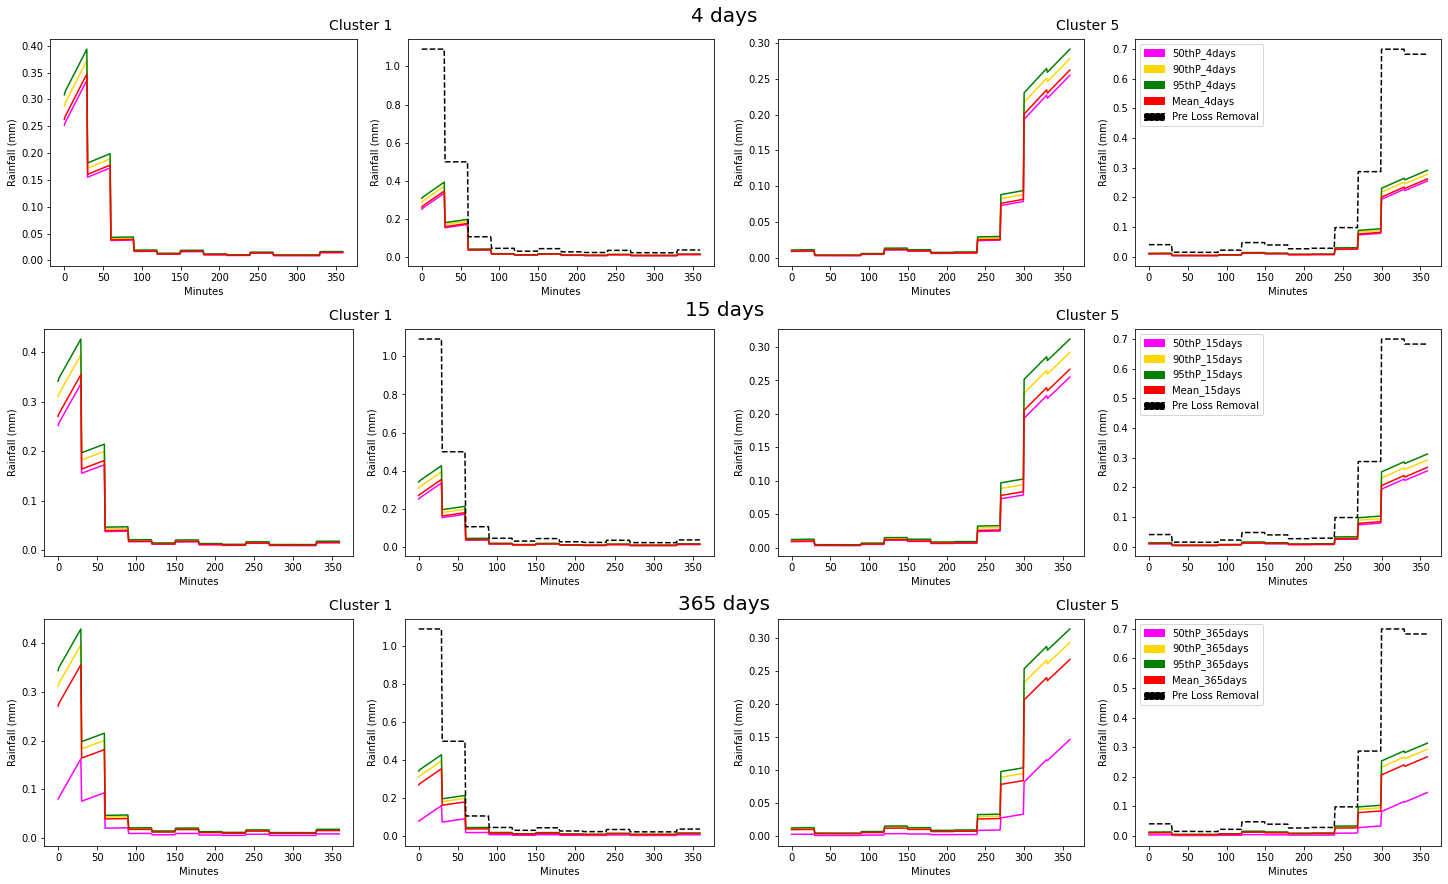

In [2]:
# Define colors to use in plotting
cols_dict = {'25thP': 'purple', '50thP': 'magenta', "90thP": 'gold',  "95thP": 'green', "99thP": 'blue', "Mean": 'red' }
# List variables to plot and labels to give them
ls_15days = ['50thP_15days', "90thP_15days",  "95thP_15days", "Mean_15days"]
ls_4days = ['50thP_4days', "90thP_4days",  "95thP_4days", "Mean_4days"]
ls_365days = ['50thP_365days', "90thP_365days",  "95thP_365days", "Mean_365days"]
lists = [ls_4days, ls_15days, ls_365days]
titles = ['4 days', '15 days', '365 days']
# PLot 
plot_results ('day', cols_dict, lists, titles)

## Considering the impact of the number of days of antecedent conditions supplied
<ins>Logic</ins>:
* Antecedent conditions can be supplied to ReFH2 for 3-365 days. 
* How much difference will the number of days of antecedent data supplied to ReFH2 make to resulting net rainfall rate?

<ins>Method</ins>:
* The net rainfall rate after removal of losses are compared for cases in which the mean, 50th, 90th and 95th percentile daily rainfall rate are applied on each day for 4, 15 and 365 days before onset of the event being modelled.  

<ins>Results</ins>:
* 50thP - highest net rainfall for 4/15 days, lower rate for 365 days
* Mean - highest net rainfall for 15/365 days, very marginally lower rate for 4 days 
* 90thP - highest net rainfall for 15/365 days, lower rate for 4 days
* 95thP - highest net rainfall for 15/365 days, lower rate for 4 days

<ins>Conclusions</ins>:
* A higher net rainfall rate means that fewer losses have been subtracted which suggests that the catchment is initially wetter.
* For a lower rainfall rate (50th percentile) supplying more days of antecedent data results in a lower net rainfall rate, whereas for higher rainfall rates (mean, 90th/95th percentiles) supplying more days of antecedent data leads to a higher net rainfall rate
* This suggests that where only a few days of data are given, ReFH2 will use some other internal calculations of antecedent conditions, and that the assumptions made in this will result in a wetter catchment than the 50th percentile, a similarly wet catchment to the mean, and a drier catchment than higher percentiles.  

In [ ]:
# Define colors to use in plotting
cols_dict_percentiles = {'4days': 'gold', '15days': 'navy', "365days": 'red'}
# List variables to plot and labels to give them
ls_50thP = ['50thP_4days', "50thP_15days", "50thP_365days"]
ls_mean = ['Mean_4days', "Mean_15days", "Mean_365days"]
ls_90thP = ['90thP_4days', "90thP_15days", "90thP_365days"]
ls_95thP = ['95thP_4days', "95thP_15days", "95thP_365days"]
lists = [ls_50thP,ls_mean, ls_90thP, ls_95thP]
titles = ['50th Percentile (0.1mm)', "Mean (1.78mm)", '90th Percentile (5.5mm)', '95th Percentile (8.6mm)']
# Plot 
plot_results ('percentile', cols_dict_percentiles, lists, titles)

## Comparing the removal of losses in observed events to loss removal in design events
<ins>Logic</ins>:
* When design events are produced in ReFH2, no antecedent conditions need to be provided; whereas, when observed events are provided to ReFH2 then antecedent conditions are needed to allow subtraction of losses from the observed event. 
* We are interested in comparing the loss removal when an event is initially generated as a design event, and the loss removal when it is considered as an observed event.

<ins>Method</ins>:
* A 6 hour, 100 year return period event was created in ReFH2. 
* The rainfall from this event was then fed back into ReFH2 as an observed event, using the variety of antecedent conditions specified above. 

<ins>Results</ins>:
* The removal of losses on an observed event which was closest to the removal of losses on a design event, came from using a rainfall rate of 0.51mm
* The 

<ins>Conclusions</ins>:
*  



In [ ]:
options = ['25thP_15days', "50thP_15days"]

fig, axs = plt.subplots(1,2,  figsize = (14,5))
singlepeak_plot(axs[0],options, cols_dict, False)
singlepeak_plot(axs[1], options, cols_dict)

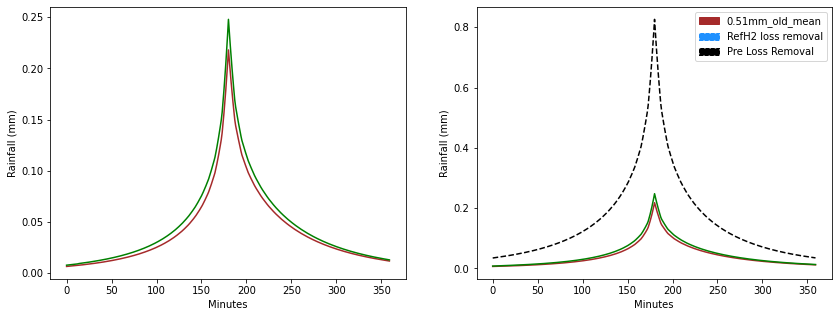

In [267]:
options = ["0.51mm_old_mean"]
cols_dict['0.51mm'] = 'brown'
fig, axs = plt.subplots(1,2,  figsize = (14,5))
singlepeak_plot(axs[0],options, cols_dict, False)
singlepeak_plot(axs[1], options, cols_dict)